# 👩🏻‍💻 머신러닝의이해 과제 #1
---



## 0️⃣ dataset 불러오기

In [8]:
# sklearn의 datasets 서브모듈에서 제공하는 breast cancer dataset 불러오기
from sklearn.datasets import load_breast_cancer
raw_data = load_breast_cancer()
raw_data

# DataFrame화 하기
import pandas as pd
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)

# 진단(diagnosis) 정보를 DataFrame에 추가
# Malignant(악성) : 0, Benign(양성) : 1
df['diagnosis'] = raw_data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
# info 조사
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
# train data, test data 분리
from sklearn.model_selection import train_test_split

y = df['diagnosis'].values
X = df.iloc[:, :-1].values

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

In [11]:
# 모델의 성능 지표를 반환하는 함수
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
  acc = accuracy_score(y_test, pred)
  pre = precision_score(y_test, pred)
  re = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  auc = roc_auc_score(y_test, pred)

  return acc, pre, re, f1, auc

In [27]:
# 모델의 성능 지표를 출력하는 함수
def print_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

  print("====================")
  print("오차 행렬 :")
  print(confusion)
  print("====================")

  print("Accuracy(정확도) : {0: .4f}".format(acc))
  print("Precision(정밀도) : {0: .4f}".format(pre))
  print("Recall(재현율) : {0: .4f}".format(re))
  print("F1 Score : {0: .4f}".format(f1))
  print("ROC-AUC Score : {0: .4f}".format(auc))



---



## 1️⃣ 세 가지 머신러닝 모델 적용

### 1.1 Logistic Regression

In [29]:
# Logistic Regression 모델로 학습
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

In [33]:
# 성능 지표 확인
print('< Logistic Regression 모델로 학습했을 때의 성능 지표 >')
get_clf_eval(y_test, lr_pred)
print_clf_eval(y_test, lr_pred)

< Logistic Regression 모델로 학습했을 때의 성능 지표 >
오차 행렬 :
[[41  1]
 [ 0 72]]
Accuracy(정확도) :  0.9912
Precision(정밀도) :  0.9863
Recall(재현율) :  1.0000
F1 Score :  0.9931
ROC-AUC Score :  0.9881


### 1.2 Decision Tree

In [44]:
# Decision Tree 모델로 학습
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=3)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

In [45]:
# 성능 지표 확인
print('< Decision Tree 모델로 학습했을 때의 성능 지표 >')
get_clf_eval(y_test, dt_pred)
print_clf_eval(y_test, dt_pred)

< Decision Tree 모델로 학습했을 때의 성능 지표 >
오차 행렬 :
[[41  1]
 [ 5 67]]
Accuracy(정확도) :  0.9474
Precision(정밀도) :  0.9853
Recall(재현율) :  0.9306
F1 Score :  0.9571
ROC-AUC Score :  0.9534


### 1.3 Random Forest

In [46]:
# Random Forest 모델로 학습
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=30, bootstrap=False)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

In [47]:
# 성능 지표 확인
print('< Random Forest 모델로 학습했을 때의 성능 지표 >')
get_clf_eval(y_test, rf_pred)
print_clf_eval(y_test, rf_pred)

< Random Forest 모델로 학습했을 때의 성능 지표 >
오차 행렬 :
[[41  1]
 [ 5 67]]
Accuracy(정확도) :  0.9474
Precision(정밀도) :  0.9853
Recall(재현율) :  0.9306
F1 Score :  0.9571
ROC-AUC Score :  0.9534


### 1.4 세 가지 모델의 성능 비교

In [39]:
# 미리 학습한 후 모델 성능 지표를 반환하는 함수
def get_result(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)

  return get_clf_eval(y_test, pred)

# 세 가지 모델의 성능을 DataFrame으로 만들어 비교
models = [lr_clf, dt_clf, rf_clf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
  col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
  tmp = []

  for model in models:
    tmp.append(get_result(model, X_train, y_train, X_test, y_test))

  return pd.DataFrame(tmp, columns=col_names, index=model_names)

results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
results

,accuracy,precision,recall,f1,roc_auc
Logistic Regression,0.991228,0.986301,1.000000,0.993103,0.988095
Decision Tree,0.947368,0.985294,0.930556,0.957143,0.953373
Random Forest,0.947368,0.985294,0.930556,0.957143,0.953373




---



## 2️⃣ 세 가지 모델 중 하나 선택 : Decision Tree

### 2.1 ROC Curve

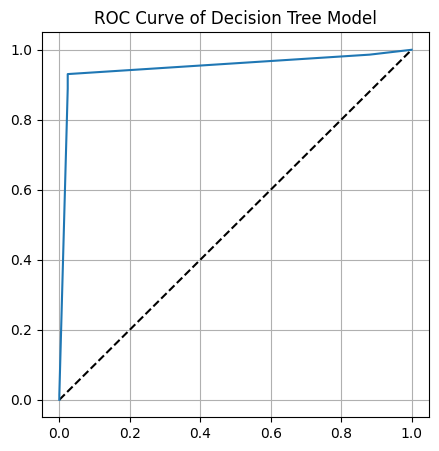

In [56]:
# Decision Tree 모델의 ROC Curve
pred_proba = dt_clf.predict_proba(X_test)[:, 1]
fall_out, recall, threshold = roc_curve(y_test, pred_proba)

plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], '--k', label='random quess')
plt.title('ROC Curve of Decision Tree Model')
plt.plot(fall_out, recall)
plt.grid()
plt.show()

### 2.2 Precision-Recall Curve

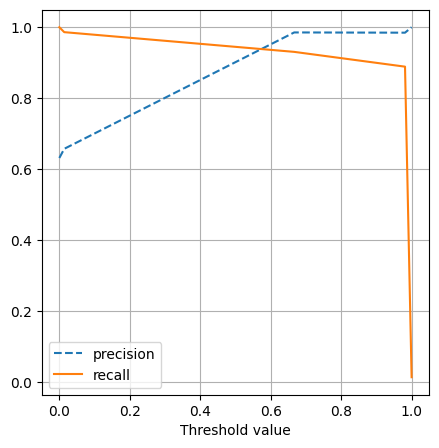

In [60]:
# Decision Tree 모델의 Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

pred_proba_c1 = dt_clf.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

plt.figure(figsize=(5, 5))
plt.plot(thresholds, precisions[:len(thresholds)], linestyle='--', label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.xlabel('Threshold value')
plt.legend()
plt.grid()
plt.show()

---



## 3️⃣ Decision Tree 모델 성능 개선 시도

### 3.1 GridsearchCV를 이용한 Hyperparameter Tuning으로 성능 개선

In [65]:
# GridSearchCV로 하이퍼 패러미터 확인
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hyperparameter grid 설정
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 설정 (교차 검증은 5-fold로 설정)
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 Hyperparameter 출력
print("Best Hyperparameters:", grid_search.best_params_)

# 최적의 모델로 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


In [66]:
# 성능 지표 확인
print('< Decision Tree 모델 GridSearch Hyperparameter Tuning 후 성능 지표 >')
get_clf_eval(y_test, y_pred)
print_clf_eval(y_test, y_pred)

< Decision Tree 모델 GridSearch Hyperparameter Tuning 후 성능 지표 >
오차 행렬 :
[[41  1]
 [ 6 66]]
Accuracy(정확도) :  0.9386
Precision(정밀도) :  0.9851
Recall(재현율) :  0.9167
F1 Score :  0.9496
ROC-AUC Score :  0.9464


### 3.2 중요한 특성만 사용하여 성능 개선

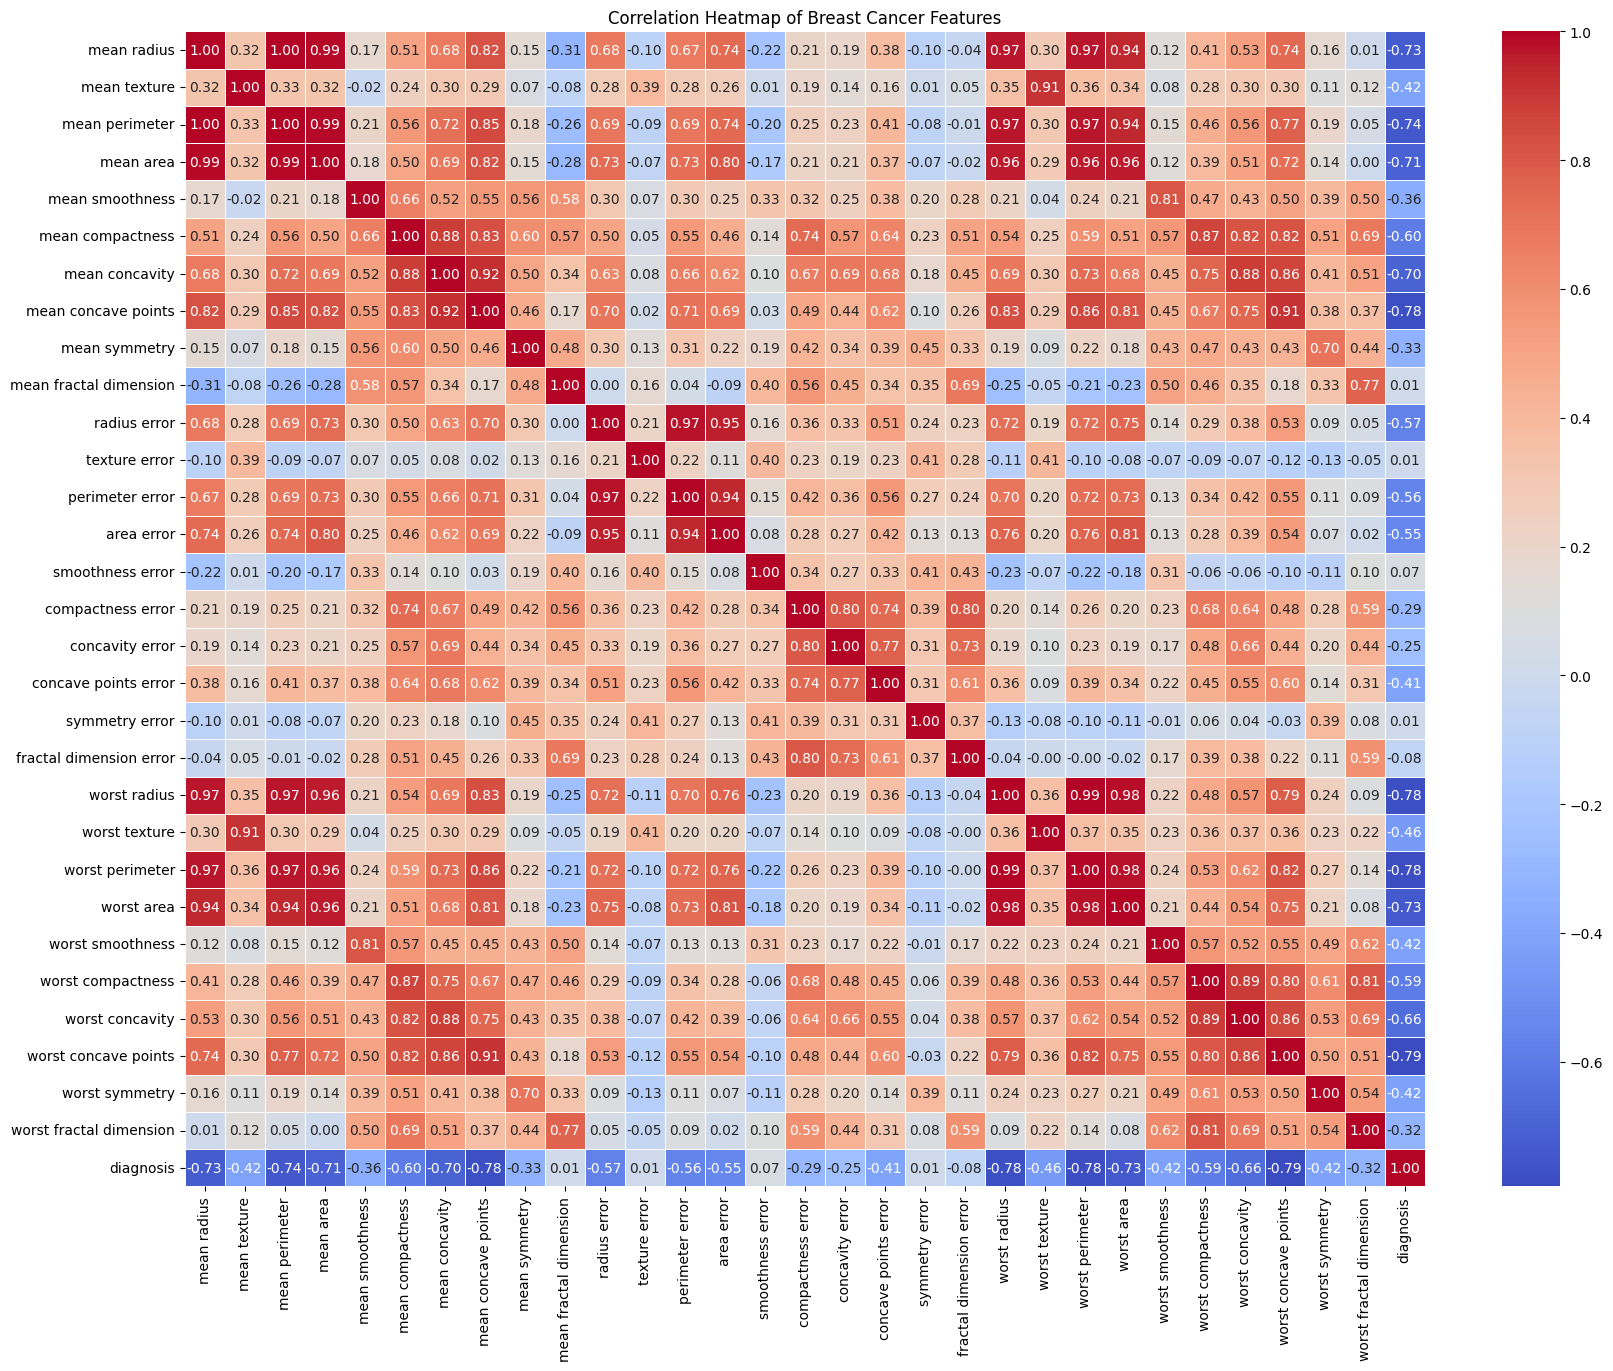

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관관계 행렬 계산
corr_matrix = df.corr()

# 히트맵 그리기
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Breast Cancer Features')
plt.show()

In [70]:
# diagnosis와의 상관계수 추출
diag_corr = corr_matrix['diagnosis']

# diagnosis와 상관계수가 0.7 이상인 특성 필터링
important_features = diag_corr[abs(diag_corr) >= 0.7].index

# 중요한 특성만 포함한 데이터프레임 생성
df_important = df[important_features]
df_important

,mean radius,mean perimeter,mean area,mean concave points,worst radius,worst perimeter,worst area,worst concave points,diagnosis
0,17.99,122.80,1001.0,0.14710,25.380,184.60,2019.0,0.2654,0
1,20.57,132.90,1326.0,0.07017,24.990,158.80,1956.0,0.1860,0
2,19.69,130.00,1203.0,0.12790,23.570,152.50,1709.0,0.2430,0
3,11.42,77.58,386.1,0.10520,14.910,98.87,567.7,0.2575,0
4,20.29,135.10,1297.0,0.10430,22.540,152.20,1575.0,0.1625,0
...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.13890,25.450,166.10,2027.0,0.2216,0
565,20.13,131.20,1261.0,0.09791,23.690,155.00,1731.0,0.1628,0
566,16.60,108.30,858.1,0.05302,18.980,126.70,1124.0,0.1418,0
567,20.60,140.10,1265.0,0.15200,25.740,184.60,1821.0,0.2650,0


In [73]:
# df_important 데이터 train data, test data 분리
from sklearn.model_selection import train_test_split

y = df_important['diagnosis'].values
X = df_important.iloc[:, :-1].values

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

In [74]:
# diagnosis와 상관계수가 0.7 이상인 특성만 남긴 데이터를 Decision Tree 모델로 학습
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=3)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

In [75]:
# 성능 지표 확인
print('< 중요한 특성만 남긴 후 Decision Tree 모델로 학습했을 때의 성능 지표 >')
get_clf_eval(y_test, dt_pred)
print_clf_eval(y_test, dt_pred)

< 중요한 특성만 남긴 후 Decision Tree 모델로 학습했을 때의 성능 지표 >
오차 행렬 :
[[41  1]
 [ 4 68]]
Accuracy(정확도) :  0.9561
Precision(정밀도) :  0.9855
Recall(재현율) :  0.9444
F1 Score :  0.9645
ROC-AUC Score :  0.9603


### 3.3 스케일링을 통한 성능 개선

<Axes: >

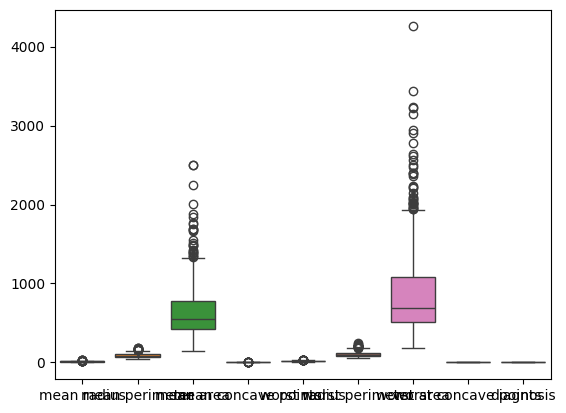

In [76]:
# 상관계수가 높았던 특성들의 Box Plot 확인
sns.boxplot(data=df_important)

In [79]:
# 상관계수가 0.7 이상인 특징 선택
important_features = diag_corr[abs(diag_corr) >= 0.7].index

# 중요한 특징만 포함한 데이터프레임 생성
df_important = df[important_features]

# MinMax Scaler와 Standard Scaler 적용
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

# 진단 정보를 제외한 피처에 스케일러 적용
X_important = df_important.drop(columns=['diagnosis'])

X_mms = MMS.fit_transform(X_important)
X_ss = SS.fit_transform(X_important)

# 스케일링된 데이터프레임 생성 (진단 정보 포함)
X_mms_pd = pd.DataFrame(X_mms, columns=X_important.columns)
X_mms_pd['diagnosis'] = df_important['diagnosis'].values

X_ss_pd = pd.DataFrame(X_ss, columns=X_important.columns)
X_ss_pd['diagnosis'] = df_important['diagnosis'].values

,accuracy,precision,recall,f1,roc_auc
Logistic Regression,0.918129,0.911504,0.962617,0.936364,0.903183
Decision Tree,0.900585,0.894737,0.953271,0.923077,0.882886
Random Forest,0.912281,0.925926,0.934579,0.930233,0.904790


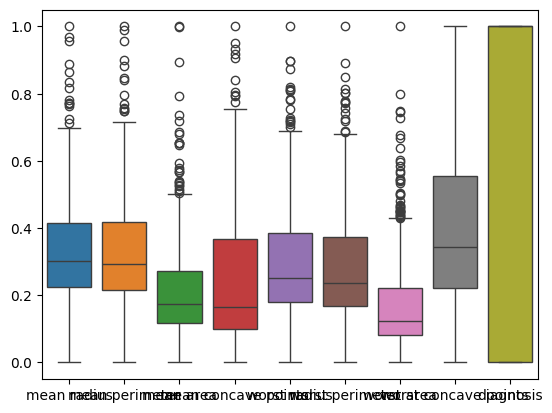

In [82]:
# MinMax Scaler 결과
sns.boxplot(data=X_mms_pd)

# MinMax Scaler 학습 결과
X_train_mms, X_test_mms, y_train_mms, y_test_mms = \
train_test_split(X_mms, y, test_size=0.3, random_state=13, stratify=y)
result_mms = get_result_pd(models, model_names, X_train_mms, y_train_mms, X_test_mms, y_test_mms)
result_mms

,accuracy,precision,recall,f1,roc_auc
Logistic Regression,0.918129,0.942857,0.925234,0.933962,0.915742
Decision Tree,0.900585,0.894737,0.953271,0.923077,0.882886
Random Forest,0.912281,0.925926,0.934579,0.930233,0.904790


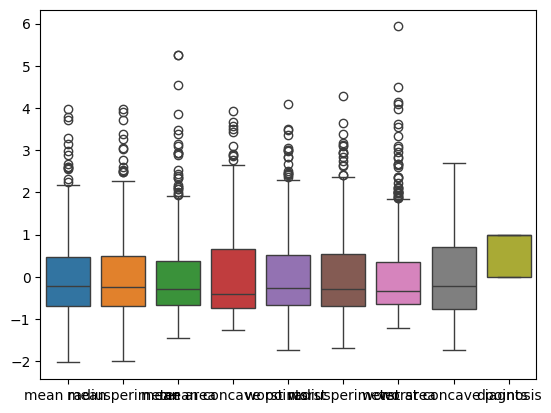

In [83]:
# Standard Scaler 결과
sns.boxplot(data=X_ss_pd)

# Standard Scaler 학습 결과
X_train_ss, X_test_ss, y_train_ss, y_test_ss = \
train_test_split(X_ss, y, test_size=0.3, random_state=13, stratify=y)
result_ss = get_result_pd(models, model_names, X_train_ss, y_train_ss, X_test_ss, y_test_ss)
result_ss

### 3.4 결과 분석

In [95]:
# 제목
print('< Decision Tree 성능 개선 결과 정리 >')

# 데이터
result = {
    'Decision Tree 학습 직후': [0.9474, 0.9853, 0.9306, 0.9571, 0.9534],
    'Gridsearch': [0.9386, 0.9851, 0.9167, 0.9496, 0.9464],
    'Feature Selection': [0.9561, 0.9855, 0.9444, 0.9645, 0.9603],
    'MinMax Scaler': [0.900585, 0.894737, 0.953271, 0.923077, 0.882886],
    'Standard Scaler': [0.900585, 0.894737, 0.953271, 0.923077, 0.882886],
}

# 컬럼명 설정
column_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC Score']

# 데이터프레임 생성 후 컬럼명 변경
result_df = pd.DataFrame(result).transpose()
result_df.columns = column_names
result_df

< Decision Tree 성능 개선 결과 정리 >


,Accuracy,Precision,Recall,F1 Score,ROC-AUC Score
Decision Tree 학습 직후,0.947400,0.985300,0.930600,0.957100,0.953400
Gridsearch,0.938600,0.985100,0.916700,0.949600,0.946400
Feature Selection,0.956100,0.985500,0.944400,0.964500,0.960300
MinMax Scaler,0.900585,0.894737,0.953271,0.923077,0.882886
Standard Scaler,0.900585,0.894737,0.953271,0.923077,0.882886




---

